In [108]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
import string

# Identify the Problem
## How can we use classification to sort messages as spam vs non-spam?
## What features are most vital to classifying spam vs. non-spam?
## How accurate will our predictions be?

## Data found on kaggle
## List string of message and informs whether it is spam or not spam

In [109]:
df = pd.read_csv('spam.csv')



df.isna().sum()



Unnamed: 0    0
spamORham     0
Message       0
dtype: int64

## We can see that the dataset contains no nulls

## When looking at the head of the dataset, we can see the message column consists of strings. 

In [110]:
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
df.tail()

,Unnamed: 0,spamORham,Message
5567,5567,spam,This is the 2nd time we have tried 2 contact u...
5568,5568,ham,Will Ì_ b going to esplanade fr home?
5569,5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,5570,ham,The guy did some bitching but I acted like i'd...
5571,5571,ham,Rofl. Its true to its name


## Preprocessing 
### Make all messages lowercase for consistency

In [112]:
df['Message'] = df['Message'].str.lower()
df.head(10)

,Unnamed: 0,spamORham,Message
0,0,ham,"go until jurong point, crazy.. available only ..."
1,1,ham,ok lar... joking wif u oni...
2,2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,3,ham,u dun say so early hor... u c already then say...
4,4,ham,"nah i don't think he goes to usf, he lives aro..."
5,5,spam,freemsg hey there darling it's been 3 week's n...
6,6,ham,even my brother is not like to speak with me. ...
7,7,ham,as per your request 'melle melle (oru minnamin...
8,8,spam,winner!! as a valued network customer you have...
9,9,spam,had your mobile 11 months or more? u r entitle...


## Data Understanding/Visualization
### Use methods to try to further understand and visualize the data. Make sure to remember your initial problems/questions when completing this step.
### While exploring, does anything else stand out to you (perhaps any surprising insights?)

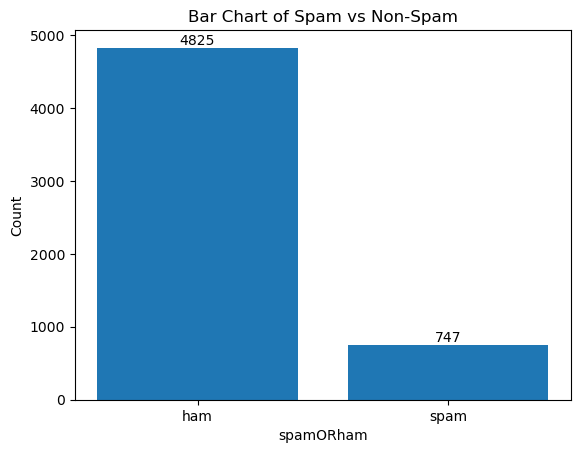

In [113]:
df['spamORham'].value_counts()

# quality df 
quality_counts = df['spamORham'].value_counts()


bars = plt.bar(quality_counts.index, quality_counts)

plt.xlabel('spamORham')
plt.ylabel('Count')
plt.title('Bar Chart of Spam vs Non-Spam')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


## We can see that the messages are mostly non-spam (86.6% non-spam vs 13.4% spam)

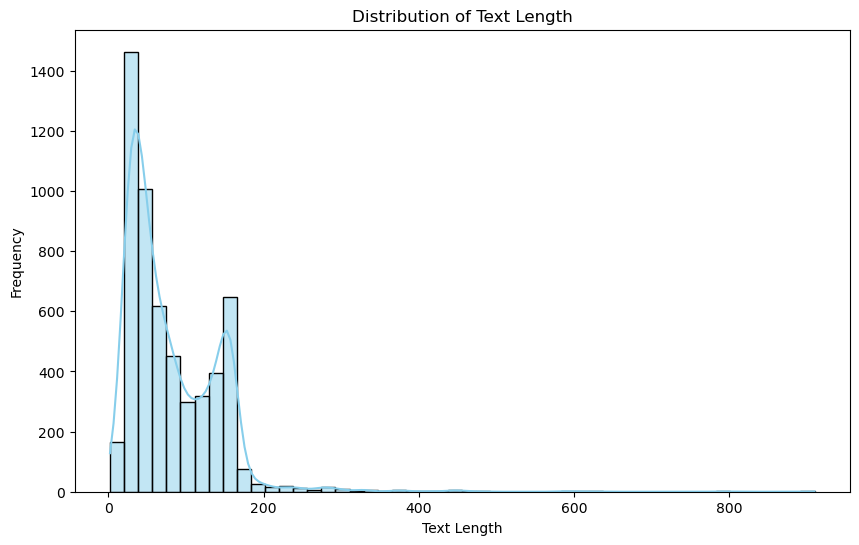

In [114]:
text_lengths = df['Message'].apply(len)


plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


### 

#                             ***          Top 10 most used words ***
## This will help us understand what words may commonly be used in spam messages. It's also important to note that many of these words are also just the most common words in the english language.


In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


In [127]:
words = [word.lower() for message in df['Message'] for word in word_tokenize(message)]
word_counts = Counter(words)
top_10_words = word_counts.most_common(10)
print('Top 10 Most Frequent Words:')
for word, frequency in top_10_words:
    print(f'{word}: {frequency}')

Top 10 Most Frequent Words:
u: 1119
call: 576
2: 478
im: 462
get: 386
ur: 384
4: 287
dont: 279
go: 278
ok: 277


### Common words such as "a", "and", and "from" frequently occur in documents. As a result, many of these words are removed from the data in order to "reduce noise". We do this here in order for the model to focus on meaningful terms that are more indicative of spam or non-spam messages. 

In [138]:
def preprocess_message(message):
    message = "".join([char for char in message if char not in string.punctuation])  
   
    message = " ".join([word for word in message.split() if word not in stop_words])  
    return message

df['Message'] = df['Message'].apply(preprocess_message)
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,go jurong point crazy available bugis n great ...
1,1,ham,ok lar joking wif u oni
2,2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,3,ham,u dun say early hor u c already say
4,4,ham,nah dont think goes usf lives around though


## *** Our text length after removing stop-words ***

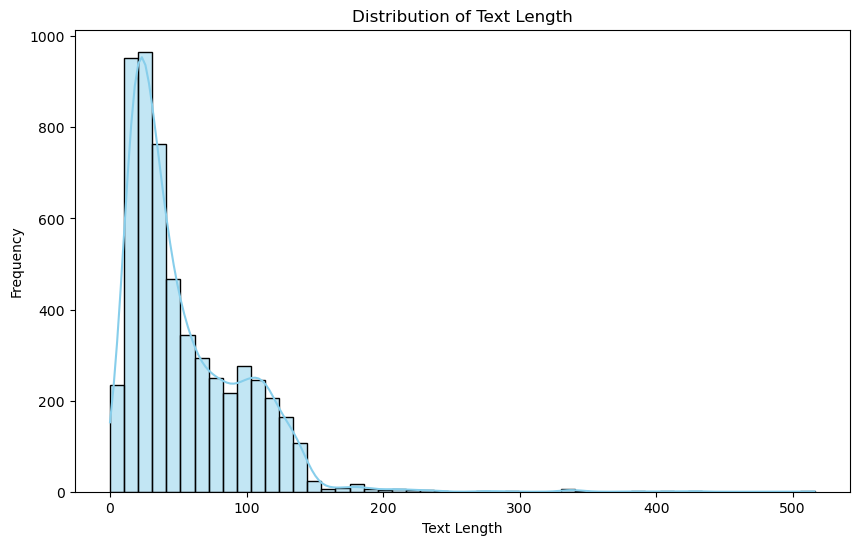

In [147]:
text_lengths = df['Message'].apply(len)


plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


## Modeling
### What model(s) do you use to try to solve your problem? Why do you choose those model(s)?
### Briefly explain each algorithm used (what is it, how does it work, pros/cons, etc.).

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['spamORham'], test_size=0.2) #training data

## Using Multinomial Naive Bayes for classification model

In [139]:
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)  
X_test_features = vectorizer.transform(X_test)       

In [140]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_features, y_train)
y_pred_mnb = mnb_model.predict(X_test_features)

In [141]:
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb, pos_label='spam')
recall_mnb = recall_score(y_test, y_pred_mnb, pos_label='spam')
f1_mnb = f1_score(y_test, y_pred_mnb, pos_label='spam')

print("**Multinomial Naive Bayes Results:**")
print("Accuracy:", accuracy_mnb)
print("Precision:", precision_mnb)
print("Recall:", recall_mnb)
print("F1-score:", f1_mnb)

**Multinomial Naive Bayes Results:**
Accuracy: 0.9811659192825112
Precision: 0.9605263157894737
Recall: 0.906832298136646
F1-score: 0.9329073482428115


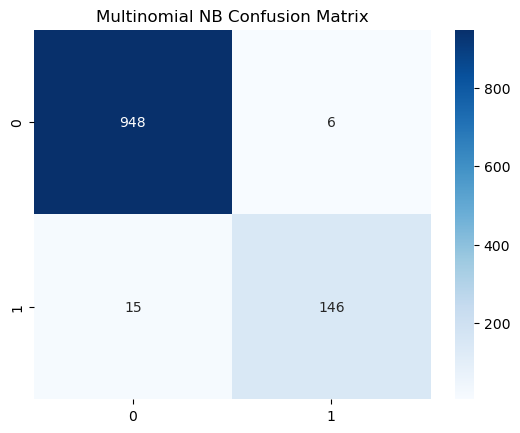

In [142]:
mnb_cm = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(mnb_cm, annot=True, fmt='d', cmap='Blues')
# Add title
plt.title('Multinomial NB Confusion Matrix')

# Show the plot
plt.show()

## Using Support Vector Machine for seperate model

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_features, y_train)
y_pred_svm = svm_clf.predict(X_test_features)

In [146]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, pos_label='spam')
recall_svm = recall_score(y_test, y_pred_svm, pos_label='spam')
f1_svm = f1_score(y_test, y_pred_svm, pos_label='spam')

print("**Multinomial Naive Bayes Results:**")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)

**Multinomial Naive Bayes Results:**
Accuracy: 0.9757847533632287
Precision: 1.0
Recall: 0.8322981366459627
F1-score: 0.9084745762711864


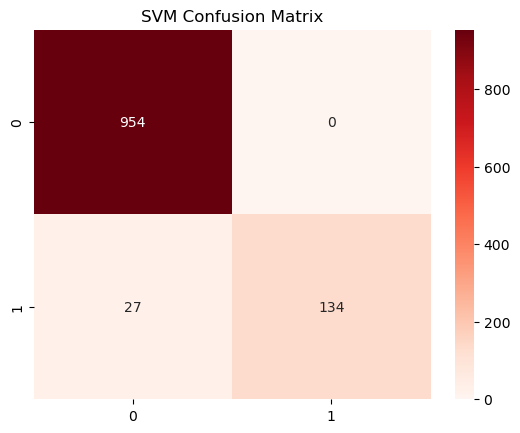

In [145]:
svm_cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds')  


plt.title('SVM Confusion Matrix')

plt.show()

## Evaluation
### How well does your model(s) perform? What evaluation metrics do you use and why?

# Both model perform well
## The multinomial naive Bayes model has an accuracy of around 98% 
## The Support Vector Machine model has an accuracu of around 97% 


### Both models do seem to have a harder time evalutating negatives. Both the SVM and MNB models have a majority of their incorrect predictions as false negatives. 